In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn stuff
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# regressor models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# model functionality and validation
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
raw_data = pd.read_csv("AmesHousing.csv", "~")

In [3]:
raw_data.keys()

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Alley', u'Lot Shape', u'Land Contour',
       u'Utilities', u'Lot Config', u'Land Slope', u'Neighborhood',
       u'Condition 1', u'Condition 2', u'Bldg Type', u'House Style',
       u'Overall Qual', u'Overall Cond', u'Year Built', u'Year Remod/Add',
       u'Roof Style', u'Roof Matl', u'Exterior 1st', u'Exterior 2nd',
       u'Mas Vnr Type', u'Mas Vnr Area', u'Exter Qual', u'Exter Cond',
       u'Foundation', u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure',
       u'BsmtFin Type 1', u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'Electrical', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fi

In [4]:
data = raw_data[["SalePrice", "1st Flr SF", "2nd Flr SF", "MS Zoning", "Lot Frontage", "Lot Area", "Land Contour", "Bldg Type", "House Style", "Overall Qual", "Overall Cond", "Year Built", "Year Remod/Add", "Bsmt Qual", "Bsmt Cond", "Heating", "Central Air", "Full Bath", "Half Bath", "Bedroom AbvGr", "Fireplaces", "Garage Type", "Garage Cars", "Pool Area", "Pool QC", "Yr Sold"]]

In [5]:
data.keys()

Index([u'SalePrice', u'1st Flr SF', u'2nd Flr SF', u'MS Zoning',
       u'Lot Frontage', u'Lot Area', u'Land Contour', u'Bldg Type',
       u'House Style', u'Overall Qual', u'Overall Cond', u'Year Built',
       u'Year Remod/Add', u'Bsmt Qual', u'Bsmt Cond', u'Heating',
       u'Central Air', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Fireplaces', u'Garage Type', u'Garage Cars', u'Pool Area', u'Pool QC',
       u'Yr Sold'],
      dtype='object')

In [6]:
simple_data = data[["SalePrice", "1st Flr SF", "2nd Flr SF", "Year Built", "Full Bath", "Half Bath", "Bedroom AbvGr", "Garage Cars", "Yr Sold"]]

In [8]:
simple_data.loc[:, "2nd Flr SF"].fillna(0, inplace=True)

In [9]:
square_feet = simple_data.loc[:,"1st Flr SF"] + simple_data.loc[:,"2nd Flr SF"]

In [10]:
square_feet.head()

0    1656
1     896
2    1329
3    2110
4    1629
dtype: int64

In [11]:
simple_data = pd.concat((simple_data, square_feet), axis=1)

In [12]:
simple_data.drop(0, axis=1, inplace=True)
simple_data.drop("1st Flr SF", axis=1, inplace=True)
simple_data.drop("2nd Flr SF", axis=1, inplace=True)

In [13]:
# remove weird square feet at the end
# simple_data = simple_data[:2930]

simple_data.tail()

,SalePrice,Year Built,Full Bath,Half Bath,Bedroom AbvGr,Garage Cars,Yr Sold
2925,142500,1984,1,0,3,2.0,2006
2926,131000,1983,1,0,2,2.0,2006
2927,132000,1992,1,0,3,0.0,2006
2928,170000,1974,1,0,2,2.0,2006
2929,188000,1993,2,1,3,3.0,2006


In [14]:
# simple_data["SalePrice"].dropna()
#simple_data.drop[2930]

Y = simple_data.loc[:,"SalePrice"]

In [15]:
Y[0:10]

0    215000
1    105000
2    172000
3    244000
4    189900
5    195500
6    213500
7    191500
8    236500
9    189000
Name: SalePrice, dtype: int64

In [16]:
# fix nans
simple_data["Garage Cars"].fillna(0, inplace=True)

simple_data.pop("SalePrice")
print simple_data.describe()

        Year Built    Full Bath    Half Bath  Bedroom AbvGr  Garage Cars  \
count  2930.000000  2930.000000  2930.000000    2930.000000  2930.000000   
mean   1971.356314     1.566553     0.379522       2.854266     1.766212   
std      30.245361     0.552941     0.502629       0.827731     0.761137   
min    1872.000000     0.000000     0.000000       0.000000     0.000000   
25%    1954.000000     1.000000     0.000000       2.000000     1.000000   
50%    1973.000000     2.000000     0.000000       3.000000     2.000000   
75%    2001.000000     2.000000     1.000000       3.000000     2.000000   
max    2010.000000     4.000000     2.000000       8.000000     5.000000   

           Yr Sold  
count  2930.000000  
mean   2007.790444  
std       1.316613  
min    2006.000000  
25%    2007.000000  
50%    2008.000000  
75%    2009.000000  
max    2010.000000  


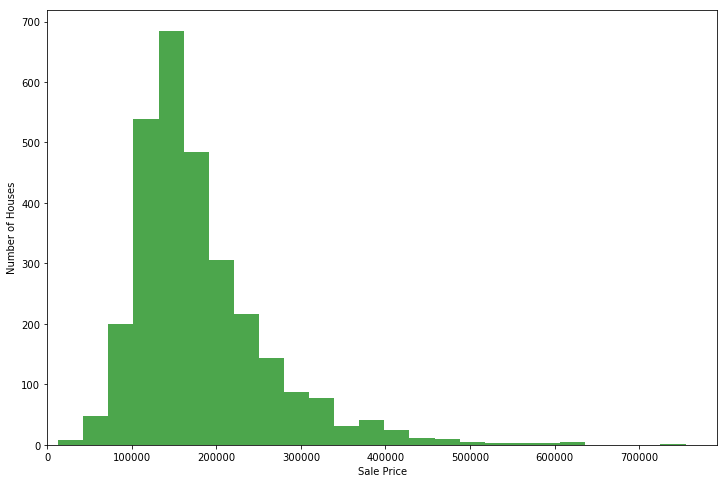

In [17]:
fig, ax = plt.subplots(figsize=(12,8))

ax.hist(Y, alpha=0.7, color="g", bins=25)

ax.set_xlim(0)
ax.set_ylim(0)
ax.set_ylabel("Number of Houses")
ax.set_xlabel("Sale Price")

In [18]:
# split into training set and test set
# simple_data.pop("SalePrice")
x_train, x_test, y_train, y_test = train_test_split(simple_data.values, Y, random_state=1337, test_size=0.25)

In [19]:
for item in range(x_train.shape[1]):

    print x_test[:,item].min(), x_test[:,item].max()

1890.0 2010.0
0.0 3.0
0.0 2.0
0.0 6.0
0.0 5.0
2006.0 2010.0


In [20]:
y_train.min(), y_train.max()

(13100, 755000)

In [71]:
def run_model(model, name, x_train, x_test, y_train, y_test):
    '''
    Run a fit on the provided data using the provided model
    
    print out the RSME as the result
    '''
    model.fit(x_train, y_train)
    
    #print model.__class__.__name__
    
    y_preds = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_preds, y_test))
    
#     scores = cross_val_score(model, simple_data, Y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
#     scores *= -1
#     rmse = np.sqrt(scores).mean()
    
    print "{:40} {:7.1f}".format(name + " RMSE:", rmse)
    
    return y_preds
    
    
def run_log_model(model, name, x_train, x_test, y_train, y_test):
    '''
    Run a fit on the provided data using the provided model
    
    print out the RSME as the result
    '''
    log_y_train = np.log(y_train)
    model.fit(x_train, log_y_train)
    
    log_y_preds = model.predict(x_test)
    y_preds = np.exp(log_y_preds)
    rmse = np.sqrt(mean_squared_error(y_preds, y_test))
    
    print "{:40} {:7.1f}".format(name + " RMSE:", rmse)
    
    return y_preds
    
def plot_error(axis, model, name, y_test, y_preds, color="blue"):
    '''
    plot the error relative to the price of the house
    '''    
    axis.scatter(y_test, y_preds - y_test, alpha=0.3, color=color, s=100)
    axis.set_title("Error rate for " + name)
    axis.set_xlabel("Actual Price of House")
    axis.set_ylabel("Predicted Price Error")

[   533.99287407  35237.21086542  13082.05738225   1203.33427287
  43293.85598458  -1367.83982344]
 336000   271891    64109
 180000   227258   -47258
 144000   148628    -4628
 182000   209571   -27571
 235000   183241    51759
 254000   227094    26906
 165000   232565   -67565
 111500    99699    11801
 247900   190584    57316
 250000   277695   -27695
51772.5082948


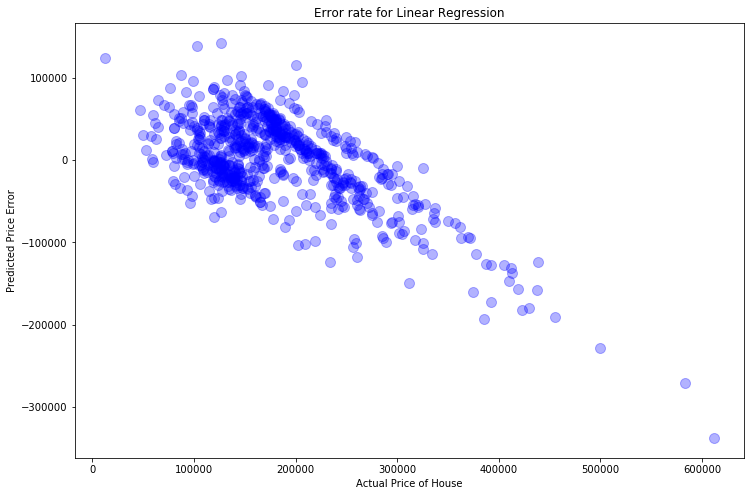

In [68]:
linear = LinearRegression()
linear.fit(x_train, y_train)

print linear.coef_

y_predis = linear.predict(x_test)

# print y_predis[:10]

# errors = [   for x, y in zip(y_test)]

for x, y in zip(y_test[:10], y_predis[:10]):
    print "{:7.0f}  {:7.0f}  {:7.0f}".format(x, y, x-y)

rmse = np.sqrt(mean_squared_error(y_predis, y_test))

print rmse

fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(y_test, y_predis - y_test, alpha=0.5, color="blue", s=20)

plot_error(ax, linear, "Linear Regression", y_test, y_predis)

Mean Sale Price:                         179696.0

Models with normal prices.

Linear RMSE:                             51772.5
Random Forests RMSE:                     47993.4
Gradient Boosting RMSE:                  44051.8
Support Vector RMSE:                     77485.6
Decision Tree RMSE:                      55278.5

Models with log transformation of price before fit.

Linear RMSE:                             50412.0
Random Forests RMSE:                     47674.5
Gradient Boosting RMSE:                  44297.9
Support Vector RMSE:                     45754.4
Decision Tree RMSE:                      55811.8


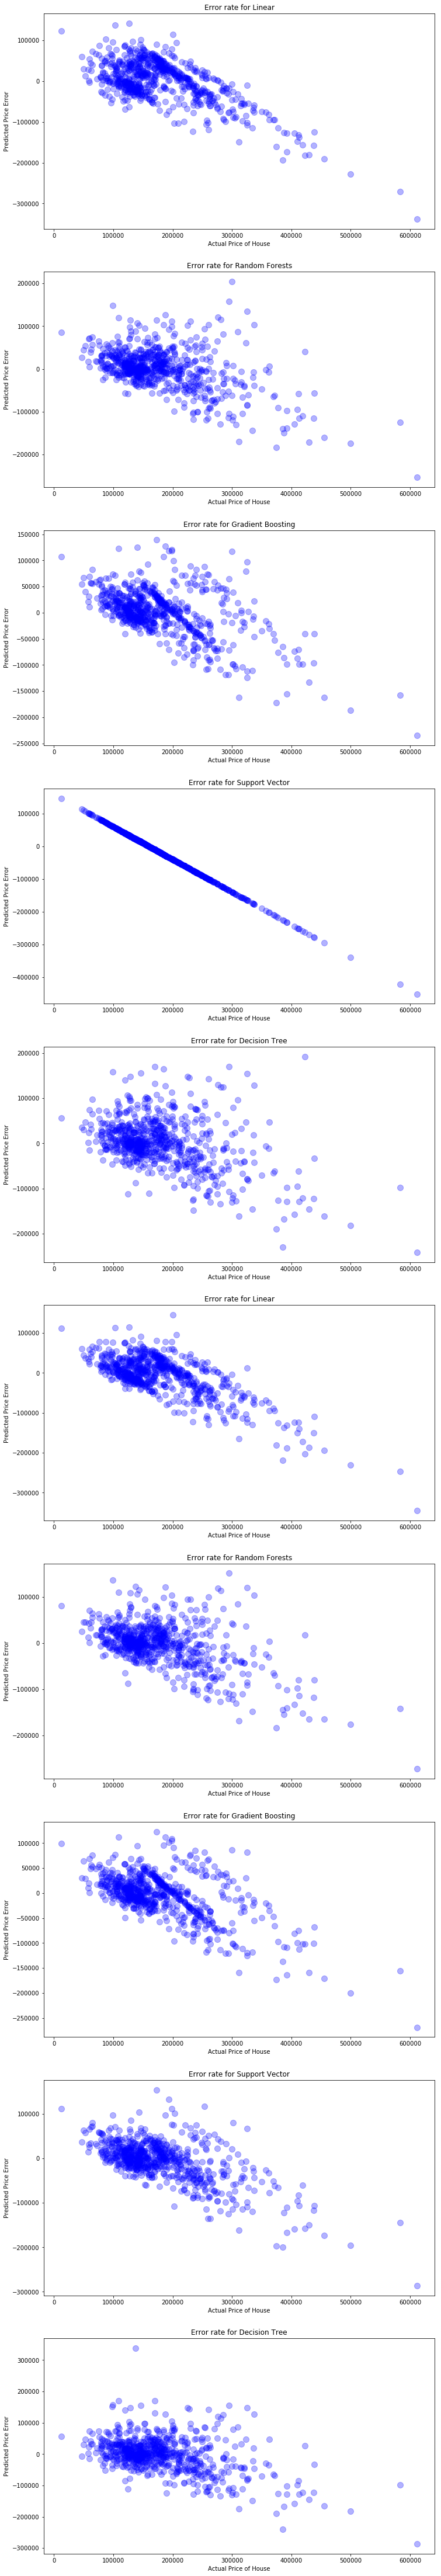

In [76]:
linear = LinearRegression()
# rfr = RandomForestRegressor()
# gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor(n_estimators=250, n_jobs=-1)
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=1000)
svr = SVR()
dtr = DecisionTreeRegressor()

models = [linear, rfr, gbr, svr, dtr]
names = ["Linear", "Random Forests", "Gradient Boosting", "Support Vector", "Decision Tree"]

fig, axes = plt.subplots(10,1, figsize=(12, 80))

# mean sale price in Y for reference
print "{:40} {:7.1f}".format("Mean Sale Price:", y_test.mean())
print
print "Models with normal prices."
print

for idx, model in enumerate(models):
    preds = run_model(model, names[idx], x_train, x_test, y_train, y_test)
    plot_error(axes[idx], model, names[idx], y_test, preds)
    
print
print "Models with log transformation of price before fit."
print

for idx, model in enumerate(models):
    preds = run_log_model(model, names[idx], x_train, x_test, y_train, y_test)
    plot_error(axes[idx+5], model, names[idx], y_test, preds)
    
# Linear RMSE:                             41977.3
# Random Forests RMSE:                     39247.0
# Gradient Boosting RMSE:                  35170.4
# Support Vector RMSE:                     81113.0

# Models with log transformation of price before fit.

# Linear RMSE:                             36565.9
# Random Forests RMSE:                     33464.8
# Gradient Boosting RMSE:                  32533.8
# Support Vector RMSE:                     69138.0

s1 shape (2197, 1)
s2 shape (2197, 1)
(2197, 1)
(2197, 1)
orig rmse: 77485.5996867
final rmse: 61795.8667585


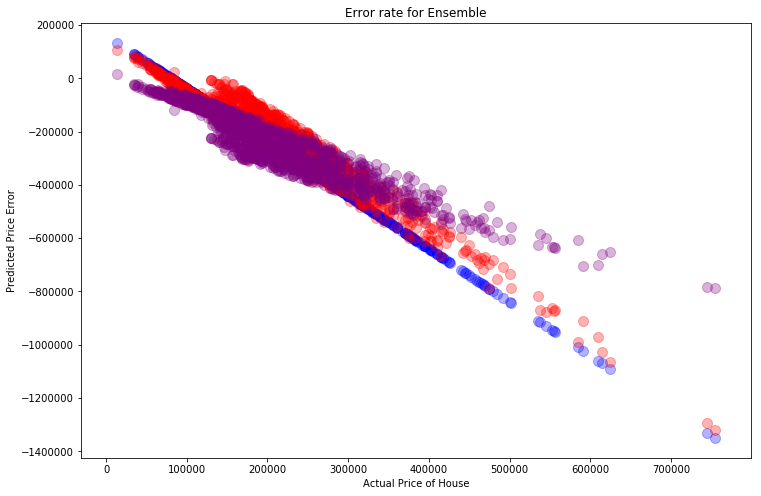

In [80]:
# support vector error on non-log price looks incredibly linear  
# lets try to make a linear regression on the errors and use that
# to compensate for the SVR predictions

# figure out new splits because need different sets of data for each stage
x_train, x_test, y_train, y_test = train_test_split(simple_data.values, Y, random_state=1337, test_size=0.25)

# make an support vector machine regressor
stage1_model = SVR()

Y_t = np.array(y_train)

# fit the model on the training data
stage1_model.fit(x_train, Y_t)

# figure out the errors
residuals = np.array(stage1_model.predict(x_train) - Y_t).reshape(-1, 1)

s1_pred = np.array(stage1_model.predict(x_train)).reshape(-1, 1)

Y_t = Y_t.reshape(-1, 1)

# make the stage 2 linear model
stage2_model = LinearRegression()

# fit stage two on the errors of stage one relative to the actual prices
stage2_model.fit(s1_pred, Y_t)

# calculate total error
s1_pred = np.array(stage1_model.predict(x_train)).reshape(-1, 1)
s2_pred = stage2_model.predict(s1_pred)

s1_error = s1_pred - Y_t
s2_error = s2_pred - Y_t

s1_eval = np.array(stage1_model.predict(x_test)).reshape(-1, 1)
s2_eval = np.array(stage2_model.predict(s1_eval)).reshape(-1, 1)

print "s1 shape", s1_pred.shape
print "s2 shape", s2_pred.shape

total_predicted_price =  s1_pred - s2_pred
total_error = total_predicted_price - Y_t

print total_error.shape
print Y_t.shape

orig_rmse = np.sqrt(mean_squared_error(s1_eval, y_test))
rmse = np.sqrt(mean_squared_error(s2_eval, y_test))

print "orig rmse:", orig_rmse
print "final rmse:", rmse

# try to evaluate errors with a chart now

fig, bx = plt.subplots(figsize=(12, 8))
plot_error(bx, linear, "Ensemble", Y_t, residuals)
plot_error(bx, linear, "Ensemble", Y_t, s2_error, color="red")
plot_error(bx, linear, "Ensemble", Y_t, residuals - s2_error, color="purple")

(array([ 17.,   7.,  17.,   2.,   4.,   0.,  13.,   5.,   0.,  26.,  13.,
          8.,   9.,  11.,   3.,  43.,   0.,   5.,  10.,  22.,  12.,  28.,
         20.,  25.,  14.,   2.,   6.,  13.,   9.,   7.,  25.,  12.,  17.,
          6.,  10.,  11.,   5.,  12.,  26.,  15.,  17.,  16.,  10.,  15.,
          8.,  15.,  20.,  15.,  14.,  20.,   5.,  16.,  13.,  14.,  10.,
         13.,   8.,  17.,  10.,   5.,   7.,  13.,   9.,   9.,   9.,   9.,
          6.,  14.,  10.,   9.,   2.,   9.,   8.,   7.,   1.,  29.,  75.,
         75.,  76.,  74.,  61.,  83.,  86.,  96.,  76.,  84.,  74.,  70.,
         73.,  64.,  40.,  52.,  26.,  23.,  16.,  21.,  21.,  15.,   8.,
          6.]), array([-134535.29330652, -132798.88978528, -131062.48626403,
        -129326.08274278, -127589.67922154, -125853.27570029,
        -124116.87217905, -122380.4686578 , -120644.06513656,
        -118907.66161531, -117171.25809406, -115434.85457282,
        -113698.45105157, -111962.04753033, -110225.64400908,
        -

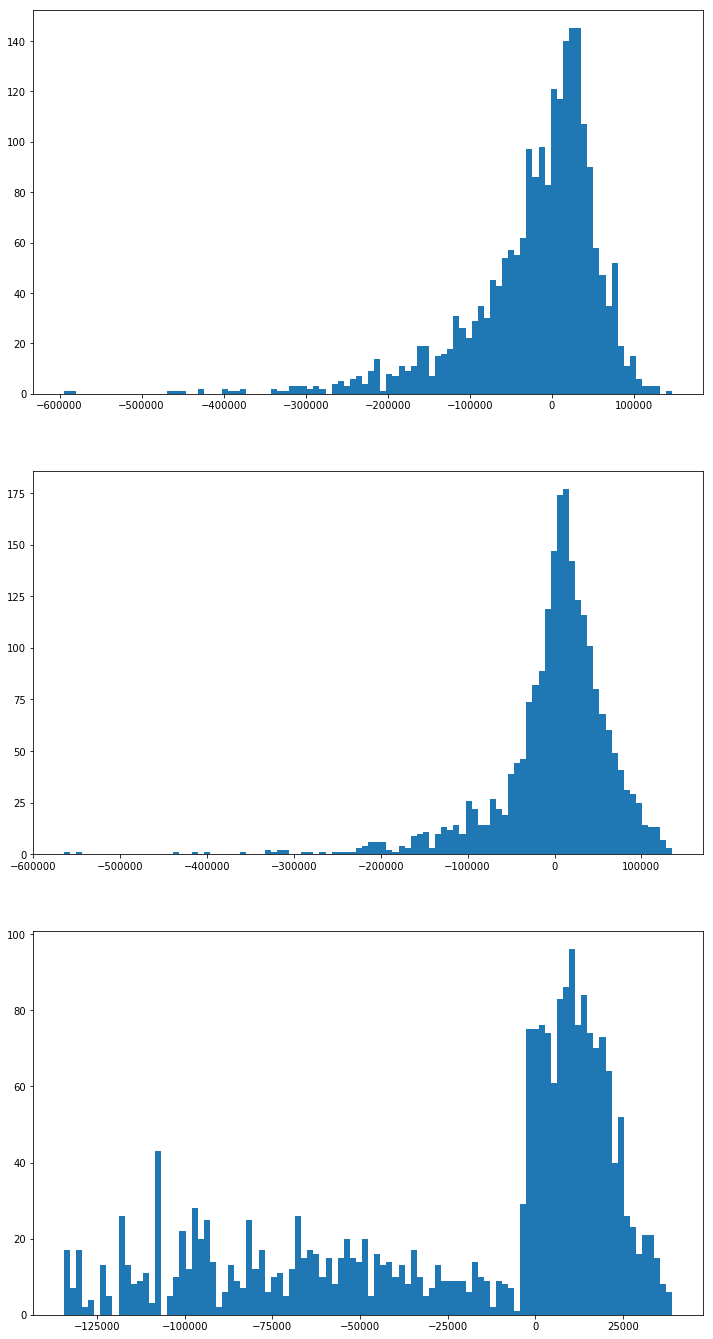

In [84]:
fig, bxs = plt.subplots(3, 1, figsize=(12, 24))
# plot_error(bxs[0], linear, "Ensemble", Y_t, residuals)
# plot_error(bxs[1], linear, "Ensemble", Y_t, s2_error, color="red")
# plot_error(bxs[2], linear, "Ensemble", Y_t, residuals - s2_error, color="purple")
bxs[0].hist(residuals, bins=100)
bxs[1].hist(s2_error, bins=100)
bxs[2].hist(residuals - s2_error, bins=100)

In [23]:
# mean sale price in Y for reference
print "{:40} {:7.1f}".format("Mean Sale Price:", y_test.mean())

#linear regressor
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_reg_y_pred = lin_reg.predict(x_test) 
lin_rmse = np.sqrt(mean_squared_error(lin_reg_y_pred, y_test))
print "{:40} {:7.1f}".format("Linear Regression RMSE:", lin_rmse)

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

rf_reg_y_pred = rf_reg.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(rf_reg_y_pred, y_test))
print "{:40} {:7.1f}".format("Random Forest Regression RMSE:", rf_rmse)

# gbr = GradientBoostingRegressor()
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=10000)
gbr.fit(x_train, y_train)
gbr_y_pred = gbr.predict(x_test)
gbr_rmse = np.sqrt(mean_squared_error(gbr_y_pred, y_test))
print "{:40} {:7.1f}".format("Gradient Boosting Regression RMSE:", gbr_rmse)

svr = SVR()
svr.fit(x_train, y_train)
svr_y_pred = svr.predict(x_test)
svr_rmse = np.sqrt(mean_squared_error(svr_y_pred, y_test))
print "{:40} {:7.1f}".format("Support Vector Regression RMSE:", svr_rmse)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.svm import SVR

Mean Sale Price:                         179696.0
Linear Regression RMSE:                      0.0
Random Forest Regression RMSE:             714.4
Gradient Boosting Regression RMSE:         336.0
Support Vector Regression RMSE:          77526.3


In [27]:
for x, y in zip(simple_data.keys(), lin_reg.coef_):
    print "{:20} {:6.1f} ".format(x, y)


SalePrice               1.0 
Year Built             -0.0 
Full Bath              -0.0 
Half Bath              -0.0 
Bedroom AbvGr           0.0 
Garage Cars            -0.0 
Yr Sold                -0.0 


In [ ]:
rf_reg = RandomForestRegressor

array([  2.41192895e+04,   1.38469996e+03,   6.11445564e+01,
         3.30503695e+01,   2.66146760e+01,   2.19271206e+01,
         1.60480272e+01])

In [263]:

# gbr = GradientBoostingRegressor()
gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=10000)
gbr.fit(x_train, y_train)
gbr_y_pred = gbr.predict(x_test)
gbr_rmse = np.sqrt(mean_squared_error(gbr_y_pred, y_test))
print "{:40} {:7.1f}".format("Gradient Boosting Regression RMSE:", gbr_rmse)

scores = cross_val_score(gbr, simple_data, Y, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

scores *= -1

Gradient Boosting Regression RMSE:       32809.7


In [264]:
scores = np.sqrt(scores)
print scores
print scores.mean()
print scores.std()

[ 36929.24952963  39227.28432201  27282.96482131  36482.61407917
  30876.31737468  40100.33359989  51918.64546704  48249.1958278
  30800.75106531  37525.0511636 ]
37939.240725
7250.93678974


In [28]:
data_pipeline = Pipeline([
    ("std_scaler", StandardScaler())
])

piped_data = data_pipeline.fit_transform(simple_data)

# split into training set and test set
# simple_data.pop("SalePrice")
train_x, test_x, train_y, test_y = train_test_split(piped_data, Y, random_state=1337, test_size=0.25)

linear = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

models = [linear, rfr, gbr, svr]
names = ["Linear", "Random Forests", "Gradient Boosting", "Support Vector"]

# mean sale price in Y for reference
print "{:40} {:7.1f}".format("Mean Sale Price:", Y.mean())
print
print "Models with normal prices."
print

for idx, model in enumerate(models):
    run_model(model, names[idx], train_x, test_x, train_y, test_y)
    
print
print "Models with log transformation of price before fit."
print

for idx, model in enumerate(models):
    run_log_model(model, names[idx], train_x, test_x, train_y, test_y)

Mean Sale Price:                         180796.1

Models with normal prices.

Linear RMSE:                                 0.0
Random Forests RMSE:                      1916.2
Gradient Boosting RMSE:                   1823.1
Support Vector RMSE:                     81113.2

Models with log transformation of price before fit.

Linear RMSE:                             29007.8
Random Forests RMSE:                       830.0
Gradient Boosting RMSE:                    905.2
Support Vector RMSE:                     13397.0


In [301]:
# ensemble with log

# do log transformation
log_train_y = np.log(train_y)
log_test_y = np.log(test_y)

# fit on linear
linear = LinearRegression()
linear.fit(train_x, log_train_y)

linear_test_pred = linear.predict(test_x)

# convert from log to regular for interim score
temp_y = np.exp(linear_test_pred)

test_residuals1 = y_test - temp_y

stage_one_rmse = np.sqrt(mean_squared_error(temp_y, y_test))
print "{:40} {:7.1f}".format("Stage 1: Linear Regression RMSE:", stage_one_rmse)

# get residuals for stage one
linear_pred = linear.predict(train_x) - train_y

# fit next stage on the residuals instead of y data
gbr = GradientBoostingRegressor()
gbr.fit(train_x, linear_pred)

# make new predictions
gbr_pred = gbr.predict(test_x)

# convert from log to regular for final score
result = np.exp(gbr_pred + linear_test_pred)
final_rmse = np.sqrt(mean_squared_error(result, y_test))
print "{:40} {:7.1f}".format("Stage 2: Gradient Boosting Regression RMSE:", final_rmse)

test_residuals2 = y_test - result



Stage 1: Linear Regression RMSE:         36565.9
Stage 2: Gradient Boosting Regression RMSE: 194712.8


(array([   1.,    7.,   20.,   60.,  114.,  142.,  100.,   79.,   51.,
          50.,   38.,   20.,   17.,    9.,    6.,    6.,    5.,    4.,
           1.,    0.,    1.,    0.,    0.,    1.,    1.]),
 array([  12789.  ,   36743.72,   60698.44,   84653.16,  108607.88,
         132562.6 ,  156517.32,  180472.04,  204426.76,  228381.48,
         252336.2 ,  276290.92,  300245.64,  324200.36,  348155.08,
         372109.8 ,  396064.52,  420019.24,  443973.96,  467928.68,
         491883.4 ,  515838.12,  539792.84,  563747.56,  587702.28,  611657.  ]),
 <a list of 25 Patch objects>)

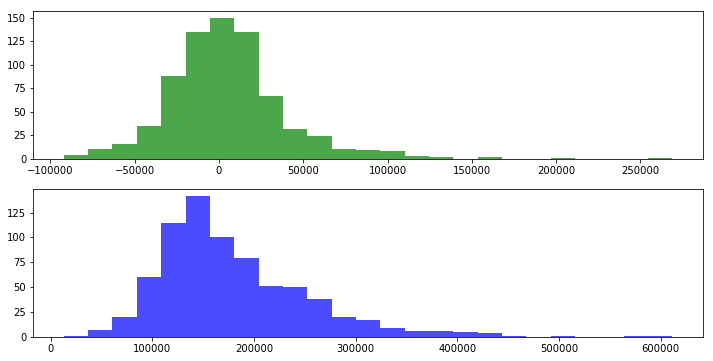

In [306]:
fig, axis = plt.subplots(2,1, figsize=(12,6))

axis[0].hist(test_residuals1, alpha=0.7, color="green", bins=25)
axis[1].hist(test_residuals2, alpha=0.7, color="blue", bins=25)